# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Bahar
- **Email:** 20sa1071@mhs.amikompurwokerto.ac.id
- **ID Dicoding:** ahmadbahar911

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah ada peran musim  terhadap jumlah pengguna sepeda?
- Pertanyaan 2 : Apakah ada peran cuaca terhadap jumlah pengguna sepeda?
- Pertanyaan 3 : Bagaimana tren penyewaan sepeda per bulan untuk setiap tahun berdasarkan data agregat?
- Pertanyaan 4 : Berapa jumlah penyewa sepeda berdasarkan rentang waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import kagglehub
import os

## Data Wrangling

### Gathering Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 52.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [3]:
# Tampilkan file di dalam folder dataset untuk melihat nama file
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['day.csv', 'Readme.txt', 'hour.csv']


In [4]:
hour = os.path.join(path, "hour.csv")
df_hour = pd.read_csv(hour)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day = os.path.join(path, "day.csv")
df_day = pd.read_csv(day)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:** Berdasarkan output di atas, kita dapat mengidentifikasi beberapa kolom penting dalam dataset, seperti:
- instant: Nomor urut baris data.
- dteday: Tanggal pengambilan data.
- season: Musim yang diwakili oleh angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, dengan 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan, dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: Nilai 1 jika hari tersebut merupakan libur, dan 0 jika bukan.
- weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: Nilai 1 jika hari tersebut adalah hari kerja (bukan libur), dan 0 jika tidak.
- weathersit: Kondisi cuaca dalam bentuk kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu yang dirasakan atau "feels like".
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Total jumlah penyewaan sepeda.







### Assessing Data

In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset ini terdiri dari 17.379 baris dan 17 kolom. Tidak ada nilai yang hilang (null) dalam dataset ini karena jumlah data non-null di setiap kolom sama dengan total jumlah baris. Dataset ini memiliki berbagai jenis tipe data, antara lain:
  - **Kolom numerik**: Kolom seperti season, yr, mnth, hr, dan lainnya memiliki tipe data integer.
  - **Kolom float**: Kolom seperti temp, atemp, hum, dan windspeed menggunakan tipe data float64.
  - **Kolom objek**: Kolom dteday memiliki tipe data objek (string). Catatan: kolom ini mungkin mengandung nilai yang tidak akurat.

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset ini terdiri dari 731 baris dan 16 kolom. Tidak ada nilai yang hilang (null) dalam dataset ini karena jumlah data non-null di setiap kolom sama dengan total jumlah baris. Dataset ini memiliki berbagai jenis tipe data, antara lain:
  - **Kolom numerik**: Kolom seperti season, yr, mnth, dan lainnya memiliki tipe data integer.
  - **Kolom float**: Kolom seperti temp, atemp, hum, dan windspeed menggunakan tipe data float64.
  - **Kolom objek**: Kolom dteday memiliki tipe data objek (string). Catatan: kolom ini mungkin mengandung nilai yang tidak akurat.

In [8]:
# Mengecek apakah ada duplikasi di dataset
df_hour.duplicated().sum()

0

In [9]:
# Mengecek apakah ada duplikasi di dataset
df_day.duplicated().sum()

0

**Insight:**

- tidak ada duplikasi pada dataset


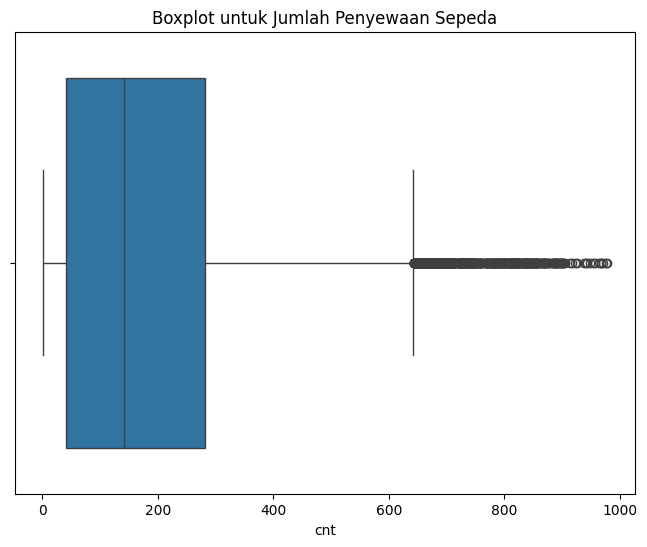

In [10]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_hour['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

In [11]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores = np.abs(stats.zscore(df_hour['cnt']))

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

# Menampilkan baris yang merupakan outlier
df_hour.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


**Insight:**

*   Ada 244 baris data yang terdeteksi sebagai outlier dengan nilai z-score lebih dari 3.




### Cleaning Data

In [12]:
# Menghapus beberapa kolom yang tidak akan digunakan
drop_col = ['instant', 'windspeed']

for i in df_hour.columns:
  if i in drop_col:
    df_hour.drop(labels=i, axis=1, inplace=True)

df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [13]:
# Mengubah nama judul kolom
df_hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

df_hour.head()

,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [14]:
# Mengubah angka menjadi keterangan
df_hour['month'] = df_hour['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_hour['season'] = df_hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_hour['weekday'] = df_hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_hour['weather_cond'] = df_hour['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [15]:
# Mengubah tipe data ke datetime
df_hour['dateday'] = pd.to_datetime(df_hour.dateday)

# Mengubaha tipe data ke categorical
df_hour['season'] = df_hour.season.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weather_cond'] = df_hour.weather_cond.astype('category')

df_hour.head()

,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0,1,1


In [16]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       17379 non-null  datetime64[ns]
 1   season        17379 non-null  category      
 2   year          17379 non-null  category      
 3   month         17379 non-null  category      
 4   hr            17379 non-null  int64         
 5   holiday       17379 non-null  category      
 6   weekday       17379 non-null  category      
 7   workingday    17379 non-null  category      
 8   weather_cond  17379 non-null  category      
 9   temp          17379 non-null  float64       
 10  atemp         17379 non-null  float64       
 11  hum           17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
 14  count         17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), f

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan
df_hour.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-17-9aa493cdd8cf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by='month').agg({


count                        
        max min        mean     sum
month                              
Apr     822   1  187.260960  269094
Aug     941   1  238.097627  351194
Dec     759   1  142.303439  211036
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     913   1  231.819892  344948
Jun     900   1  240.515278  346342
Mar     957   1  155.410726  228920
May     873   1  222.907258  331686
Nov     729   1  177.335421  254831
Oct     963   1  222.158511  322352
Sep     977   1  240.773138  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan September. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

In [18]:
#Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca
df_hour.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-039463790b49>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by='weather_cond').agg({


count                         
                      max min        mean      sum
weather_cond                                      
Clear/Partly Cloudy   977   1  204.869272  2338173
Light Snow/Rain       891   1  111.579281   158331
Misty/Cloudy          957   1  175.165493   795952
Severe Weather        164  23   74.333333      223

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

In [19]:
#Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

df_hour.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-19-9b3e1d384a49>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by='season').agg({


casual  registered count                
             mean        mean   max min        mean
season                                             
Fall    50.287144  185.729093   977   1  236.016237
Spring  14.290901   96.823668   801   1  111.114569
Summer  46.160581  162.183488   957   1  208.344069
Winter  30.666824  168.202032   967   1  198.868856

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

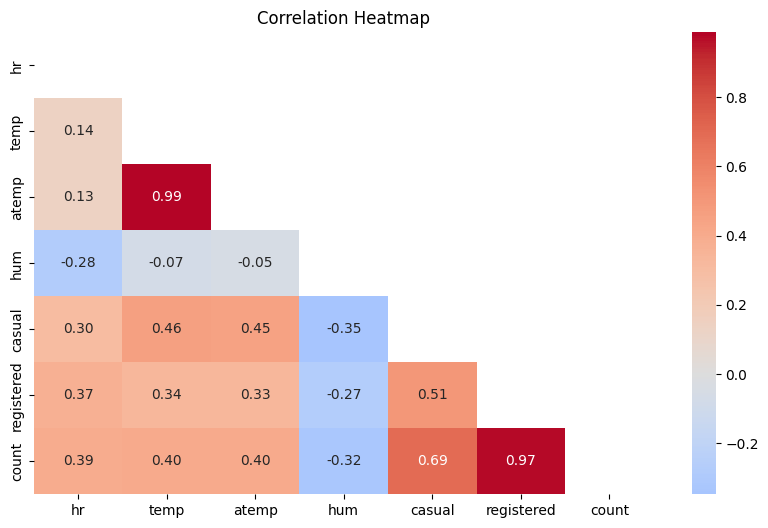

In [20]:
#Hubungan antara penyewa casual, registered, dan count

fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = df_hour.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (-0.07 dan -0.05).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-21-43454c66f9a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season',


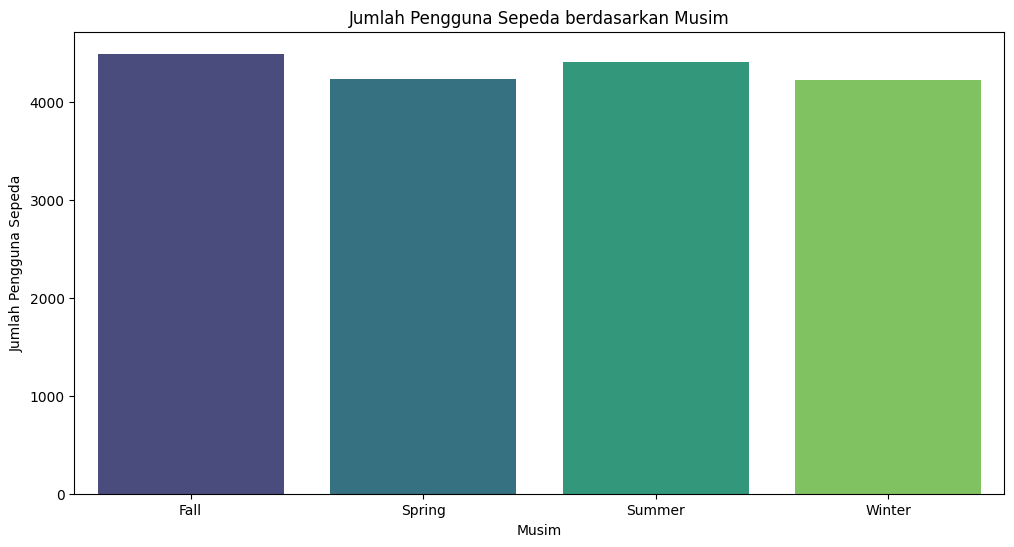

In [21]:
# Plot the distribution of bike rentals by season
plt.figure(figsize=(12, 6))
sns.countplot(x='season',
              data=df_hour,
              palette='viridis')

plt.title('Jumlah Pengguna Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa
Fall dan Summer adalah musim dengan tingkat penggunaan sepeda tertinggi.


### Pertanyaan 2:

<ipython-input-22-af26bb4bf162>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


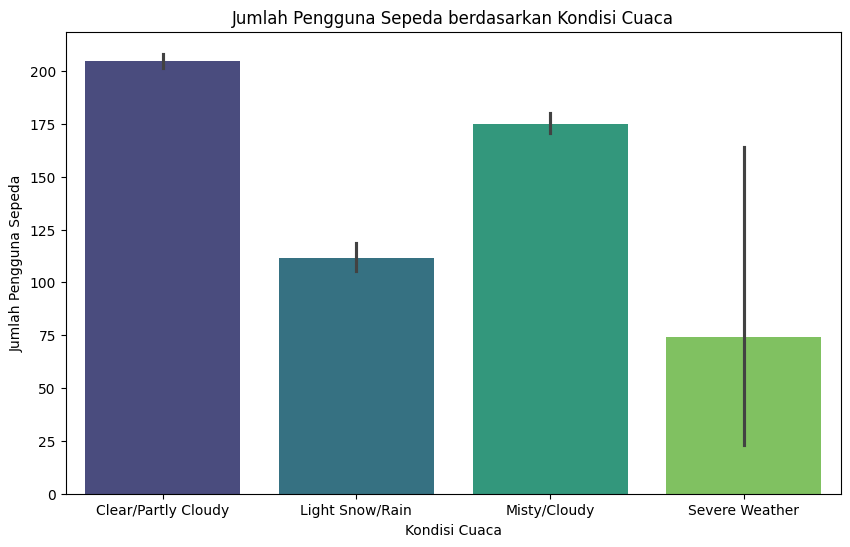

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=df_hour,
    palette='viridis')

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- Cuaca cerah dan mendung ringan mendukung aktivitas bersepeda, sementara cuaca buruk seperti hujan deras atau salju lebat mengurangi pengguna.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3:

<ipython-input-23-ec8dcac0d452>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = df_hour.groupby(['year', 'month'])['count'].sum().reset_index()


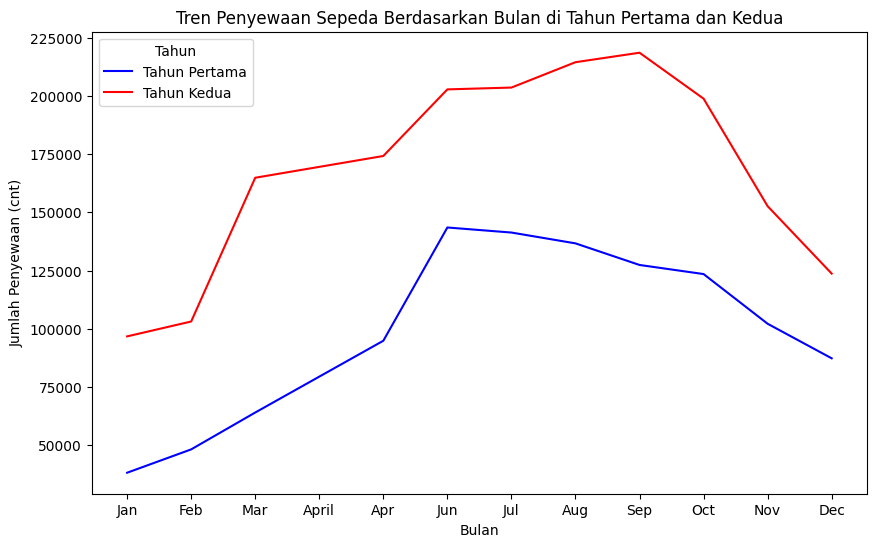

In [23]:

# Data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = df_hour.groupby(['year', 'month'])['count'].sum().reset_index()


# Menentukan urutan bulan (dari Januari hingga Desember)
month_order = ['Jan', 'Feb', 'Mar', 'April', 'Apr', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Mengatur kolom 'month' sebagai kategori dengan urutan yang benar
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# Visualisasi dengan line plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(
    data=monthly_trend,
    x='month',
    y='count',
    hue='year',
    palette=['blue', 'red']  # Warna garis
)

# Menyesuaikan legend agar sesuai dengan garis
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Tahun Pertama', 'Tahun Kedua'], title='Tahun')

# Menambahkan judul dan label
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (cnt)')

# Menampilkan plot
plt.show()

**Insight:**
- Jumlah penyewaan sepeda di tahun kedua selalu lebih tinggi dibandingkan dengan tahun pertama.  Pada periode awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus), terdapat peningkatan yang signifikan.  Namun, di akhir tahun, jumlah penyewaan terus menunjukkan penurunan yang konsisten.

### Pertanyaan 4:

In [24]:
# Membuat kolom baru 'rentang_waktu' berdasarkan jam
def assign_time_of_day(hr):
    if 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 16:
        return 'Siang'
    elif 16 <= hr < 20:
        return 'Sore'
    else:
        return 'Malam'




**Insight :**
- Fungsi tersebut adalah untuk membuat kolom baru bernama rentang_waktu berdasarkan jam tertentu dengan mengelompokkan jam ke dalam empat kategori waktu dalam sehari: Pagi, Siang, Sore, dan Malam.
- Fungsi assign_time_of_day sangat berguna untuk mengelompokkan data berdasarkan waktu tertentu, sehingga cocok digunakan untuk analisis data waktu seperti pola aktivitas harian atau segmentasi waktu.

In [25]:
# Asign jam ke kategori rentang waktu
df_hour['rentang_waktu'] = df_hour['hr'].apply(assign_time_of_day)

In [26]:
# Hitung jumlah penyewaan berdasarkan rentang waktu
grouped = df_hour.groupby('rentang_waktu')['count'].sum().reset_index()


<ipython-input-27-fa46dbe2e86d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rentang_waktu',


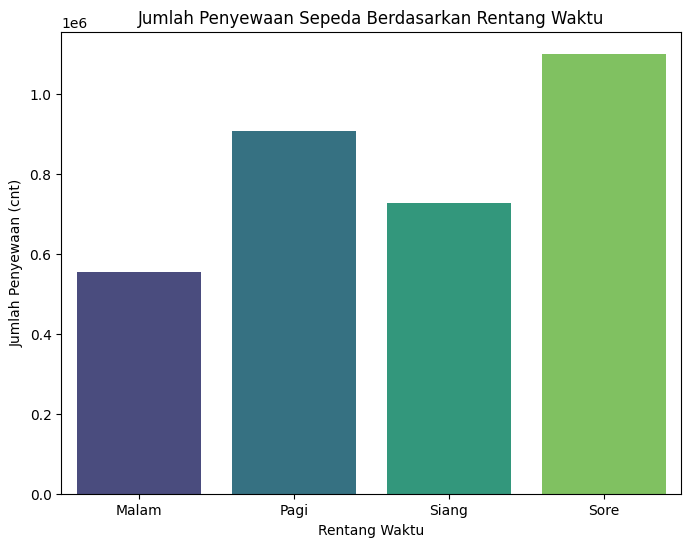

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='rentang_waktu',
            y='count',
            data=grouped,
            palette='viridis')  # Menggunakan palet warna 'viridis'

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Rentang Waktu')
plt.xlabel('Rentang Waktu')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()


 **Insight:**
*   Malam hari mencatat jumlah penyewaan paling sedikit, sekitar 600 ribu.
*   Pagi hari menempati posisi kedua dengan total sekitar 900 ribu penyewaan.  
*   Siang hari memiliki jumlah penyewaan yang lebih rendah dibandingkan pagi dan sore, yaitu sekitar 700 ribu.  
*   Sore hari mencatat jumlah penyewaan tertinggi, melebihi 1 juta penyewaan.

## Conclusion

- **Conclution pertanyaan 1:** Penggunaan sepeda tertinggi terjadi pada musim gugur (Fall) dan musim panas (Summer), kemungkinan karena cuaca yang lebih nyaman. Sebaliknya, penggunaan sepeda terendah tercatat pada musim semi (Spring), yang mungkin disebabkan oleh cuaca yang kurang stabil. Meski demikian, musim dingin (Winter) tetap menunjukkan tingkat penggunaan sepeda yang cukup signifikan, meskipun cuaca dingin biasanya menjadi penghalang. Pola ini menunjukkan bahwa cuaca memainkan peran penting dalam aktivitas bersepeda, yang dapat digunakan untuk perencanaan transportasi dan promosi.


- **Conclution pertanyaan 2:**  Pengguna sepeda paling banyak ditemukan saat cuaca cerah atau mendung ringan, menunjukkan preferensi untuk kondisi cuaca yang nyaman. Sebaliknya, cuaca buruk seperti hujan deras atau salju lebat secara signifikan mengurangi jumlah pengguna sepeda. Hal ini mengindikasikan bahwa cuaca merupakan faktor penting dalam aktivitas bersepeda.


- **Conclution pertanyaan 3:** Berdasarkan data yang dianalisis, dapat disimpulkan bahwa jumlah penyewaan sepeda pada tahun kedua secara konsisten lebih tinggi dibandingkan tahun pertama. Peningkatan signifikan terlihat pada awal tahun (Januari hingga Maret) dan selama musim puncak (Mei hingga Agustus). Namun, di akhir tahun, jumlah penyewaan mengalami penurunan yang konsisten. Tren ini menunjukkan adanya faktor musiman dan perubahan perilaku penyewa sepanjang tahun yang perlu diperhatikan dalam perencanaan dan pengelolaan penyewaan sepeda.


- **Conclution pertanyaan 4:** Berdasarkan data yang dianalisis, jumlah penyewaan sepeda menunjukkan variasi sepanjang hari. Sore hari mencatatkan jumlah penyewaan tertinggi, melebihi 1 juta penyewaan. Pagi hari menempati posisi kedua dengan sekitar 900 ribu penyewaan, sementara siang hari tercatat lebih rendah, sekitar 700 ribu penyewaan. Malam hari memiliki jumlah penyewaan paling sedikit, yaitu sekitar 600 ribu. Hal ini menunjukkan bahwa waktu sore memiliki permintaan tertinggi, sementara malam hari cenderung menjadi periode dengan aktivitas penyewaan yang paling rendah.